# Predicting heart disease using machine learning (Binary Prediction)

## 1. Problem Definition
> Given clinical parameters, predicting if they have a heart disease

## 2. Data 
> Heart Disease dataset from kaggle

## 3. Evaluation
> If the accuracy is high (95%) the model is good enough

## 4. Features
> What features should be modeled?

In [1]:
# All imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

### Data explorations
1. what are we trying to solve?
2. what kind of data we have? whick types?
3. What os missing? (Filling values)
4. Are there outliers and why should we consider them?
5. How can we add, change or remove features to get more out of the data? (Transformations)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### A bit more examples for one class

In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

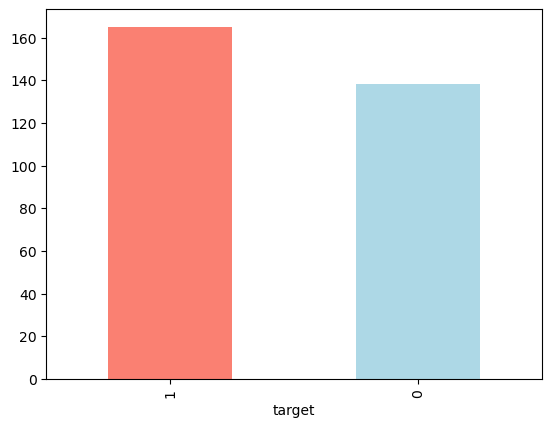

In [5]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon","lightblue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### No missing values

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing features to target

In [9]:
df["sex"].value_counts() # More males

sex
1    207
0     96
Name: count, dtype: int64

* Apparently for the sample set, women have more of a chance of a heart disease

In [10]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


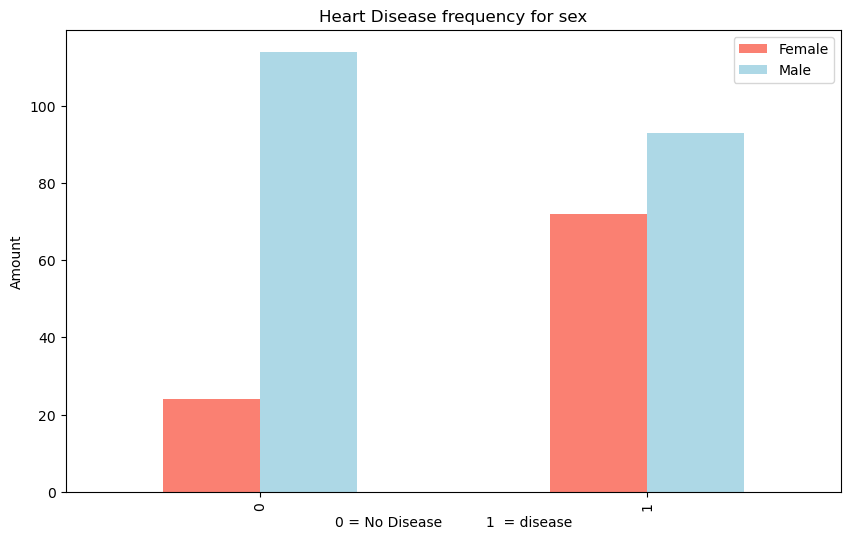

In [11]:
# Create plot of crosstab
pd.crosstab(df["target"],df["sex"]).plot(kind = "bar",
                                        figsize = (10,6),
                                        color = ["salmon","lightblue"])
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease          1  = disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])

### Other Features

In [12]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Max Heart Rate (Thalach) for Heart Disease (Target not linearly seperable by these two variables)

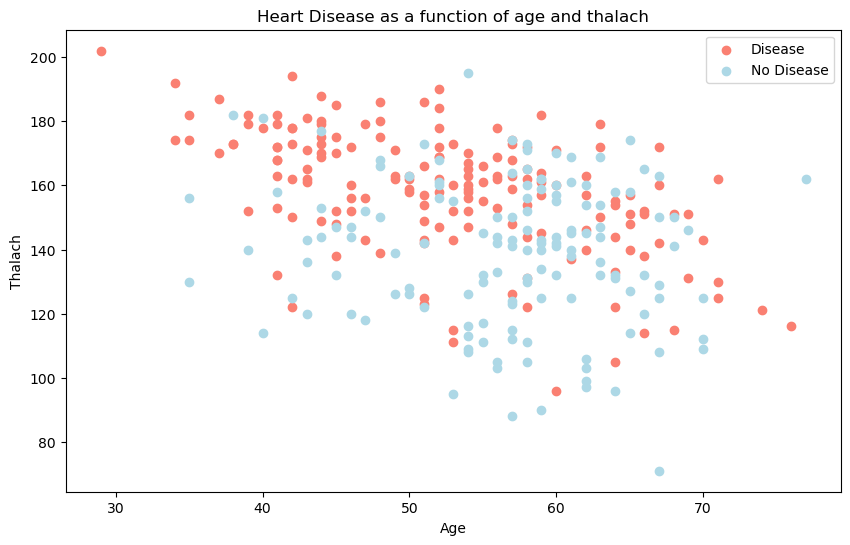

In [13]:
plt.figure(figsize = (10,6))

# Scattering positive examples
plt.scatter(df["age"][df["target"] == 1],
            df["thalach"][df["target"] == 1],
            c = "salmon")

# Scattering negative examples
plt.scatter(df["age"][df["target"] == 0],
            df["thalach"][df["target"] == 0],
            c = "lightblue")

plt.title("Heart Disease as a function of age and thalach")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease","No Disease"])

* Plotting distribution of age (Checking for outliers and generate distribution)

<Axes: ylabel='Frequency'>

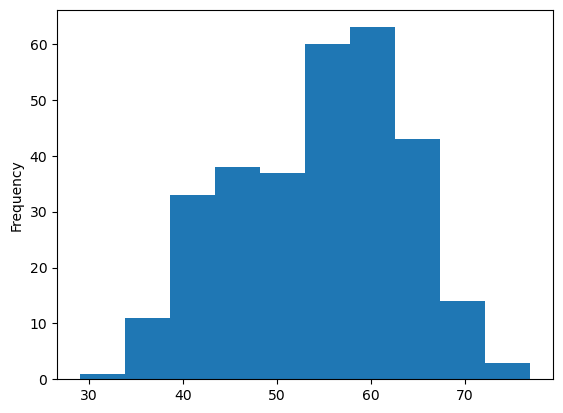

In [14]:
df["age"].plot(kind = "hist")

### cp (chest pain) vs target

### Heart Disease per chest pain type
Total of 4 types

In [15]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'Amount')

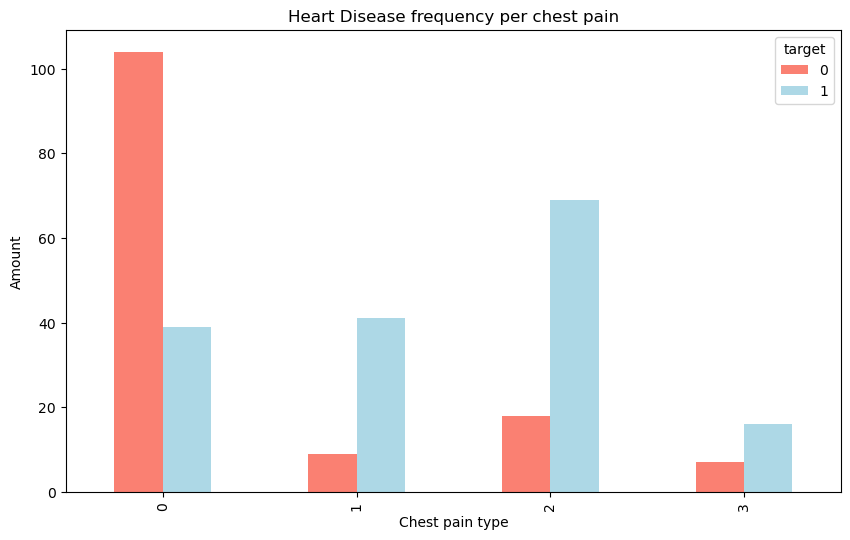

In [16]:
# Visaulization
pd.crosstab(df["cp"],df["target"]).plot(kind = "bar",
                                       figsize = (10,6),
                                       color = ["salmon","lightblue"])
plt.title("Heart Disease frequency per chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")

### Corelation Matrix analyses

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


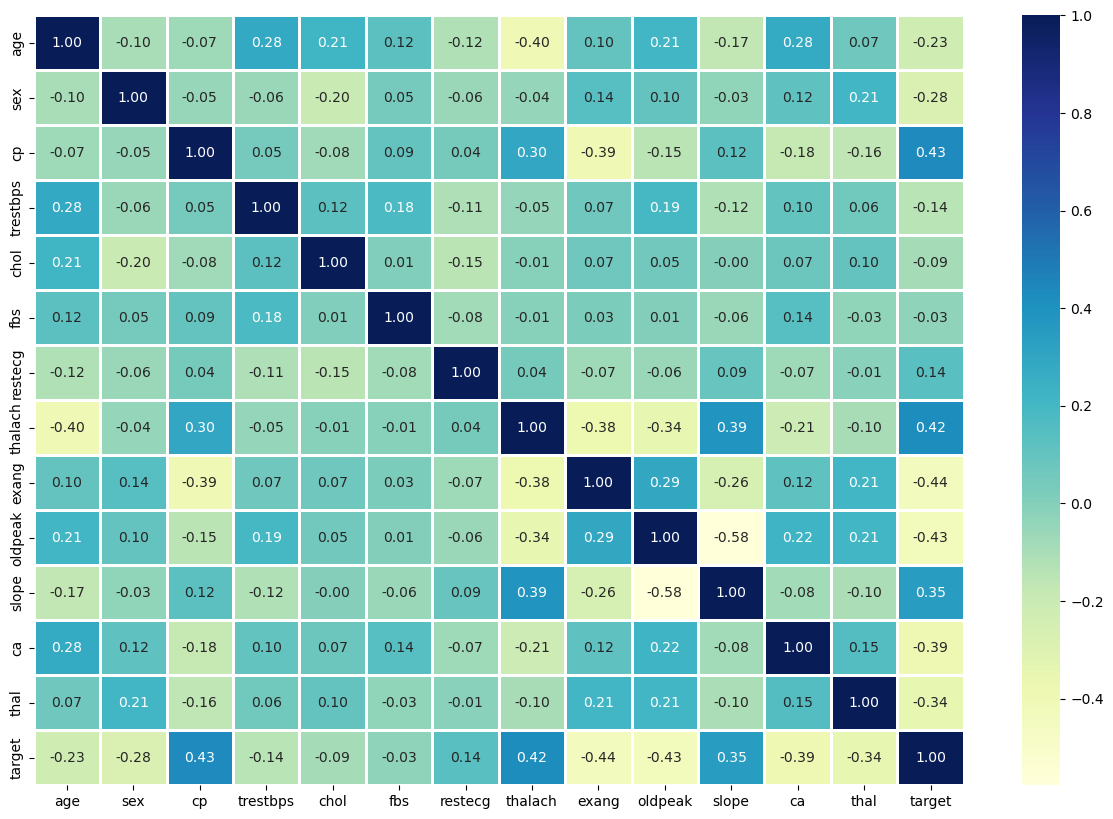

In [19]:
# Making heat map
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(data = corr_matrix,
                annot = True,
                annot_kws = {"size": 10},
                linewidths=1,
                fmt = ".2f",
                cmap = "YlGnBu")

Text(0, 0.5, 'Amount')

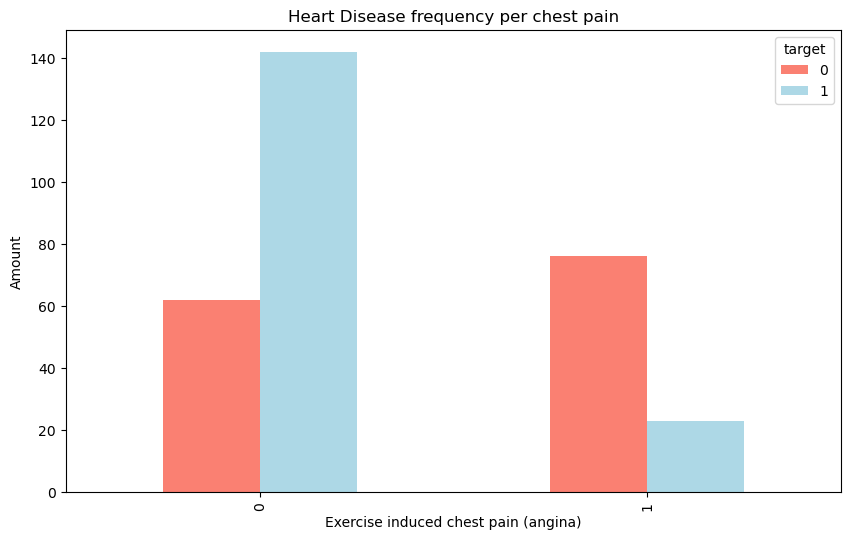

In [21]:
# Visaulization of exange angina (exang)
pd.crosstab(df["exang"],df["target"]).plot(kind = "bar",
                                       figsize = (10,6),
                                       color = ["salmon","lightblue"])
plt.title("Heart Disease frequency per chest pain")
plt.xlabel("Exercise induced chest pain (angina)")
plt.ylabel("Amount")

# Modeling

### Data Preperation

In [26]:
# Splitting Data to X aand y
X = df.drop("target",axis = 1)
y = df["target"]

In [28]:
# Train and test split
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### What model should we use? According to sklearn ML map

In [31]:
# Build modle dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()
         }

In [39]:
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits multiple machine learning models on training data and evaluates their performance on test data.

    Parameters:
    -----------
    models : dict
        A dictionary where keys are model names (strings) and values are instantiated machine learning model objects (e.g., from scikit-learn).
    X_train : array-like or DataFrame
        Training feature data used to fit the models.
    X_test : array-like or DataFrame
        Test feature data used to evaluate the models.
    y_train : array-like or Series
        Training target data used to fit the models.
    y_test : array-like or Series
        Test target data used to evaluate the models.

    Returns:
    --------
    model_scores : dict
        A dictionary where the keys are model names (as provided in `models`) and values are the respective model's accuracy score (or the default scoring method for that model) on the test data.
    """
    # Set random seed
    np.random.seed(42)
    # Build model scores dict
    model_scores = {}
    for name,model in models.items():
        # Fit model to data
        model.fit(X_train,y_train)
        # Eval model and add to model scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [42]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

C:\Users\kingh\Desktop\CV_and_projects\ML-DS-Udemy\MachineLearningUdemy\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model comparison

<Axes: >

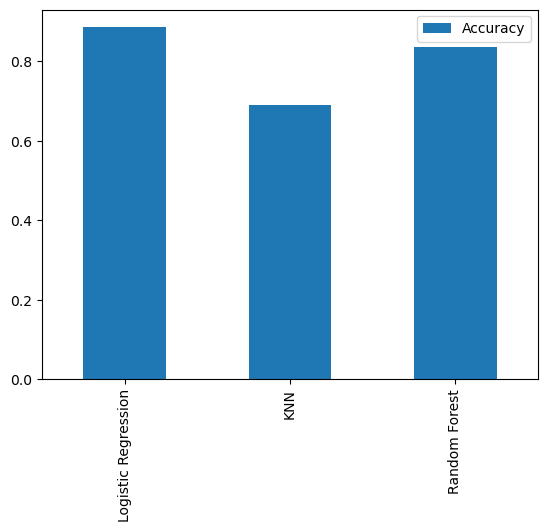

In [43]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar()

### Hyper parameter tuning, CrossValidation , Feature importance , more metrics

* Tuning KNN

In [46]:
train_scores = []
test_scores = []

# Create a list of different values for the n_neighbors parameter
neighbors = range(1,21)

# instance 
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # Fit
    knn.fit(X_train,y_train)

    # Eval on train and test
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


Text(0, 0.5, 'Scores')

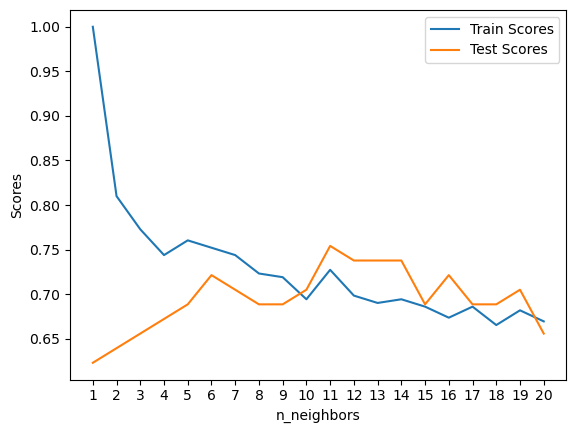

In [49]:
plt.plot(neighbors,train_scores,label = "Train Scores")
plt.plot(neighbors,test_scores,label = "Test Scores")
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Scores")

### KNN will be discarded 

## Randomized Search CV and Grid Search CV

* Logistic regression
* Randim forest

In [50]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

## Looking for possibly good ranges for params for later Grid Search
 * Using Randomized Search CV

### Logistic Regression

In [53]:
np.random.seed(42)
num_of_folds= 5

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = num_of_folds,
                               n_iter= 20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [54]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [55]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

### Random Forest (Takes a bit more time)

In [67]:
np.random.seed(42)
num_of_folds= 5

rs_rf_reg = RandomizedSearchCV(estimator=RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv = num_of_folds,
                               n_iter= 20,
                               verbose=True
                              )
rs_rf_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [68]:
rs_rf_reg.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [69]:
rs_rf_reg.score(X_test,y_test)

0.8688524590163934

## Tuning Logistic Regression model using GridSearchCV, (So far the best)

In [122]:
# Grid definition
log_reg_grid = {"C": np.logspace(-6,3,10,base = 2),
                "solver": ["liblinear"],
                "max_iter": np.arange(10,100,10),
                "penalty": ["l2","l1"]}
gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=log_reg_grid,
                         verbose=True,
                         n_jobs=-1)
gs_log_reg.fit(X_train,y_train)
LogisticRegression()

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\kingh\Desktop\CV_and_projects\ML-DS-Udemy\MachineLearningUdemy\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression()

In [123]:
gs_log_reg.best_params_

{'C': 0.25, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [124]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442